**Time Series Forecasting using GRU**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.metrics import mean_squared_error
import math

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url)

data = df[['Passengers']].values.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [3]:
def create_dataset(dataset, time_step=12):
    X, y = [], []
    for i in range(len(dataset) - time_step):
        X.append(dataset[i:i + time_step, 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 12
X, y = create_dataset(data_scaled, time_step)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

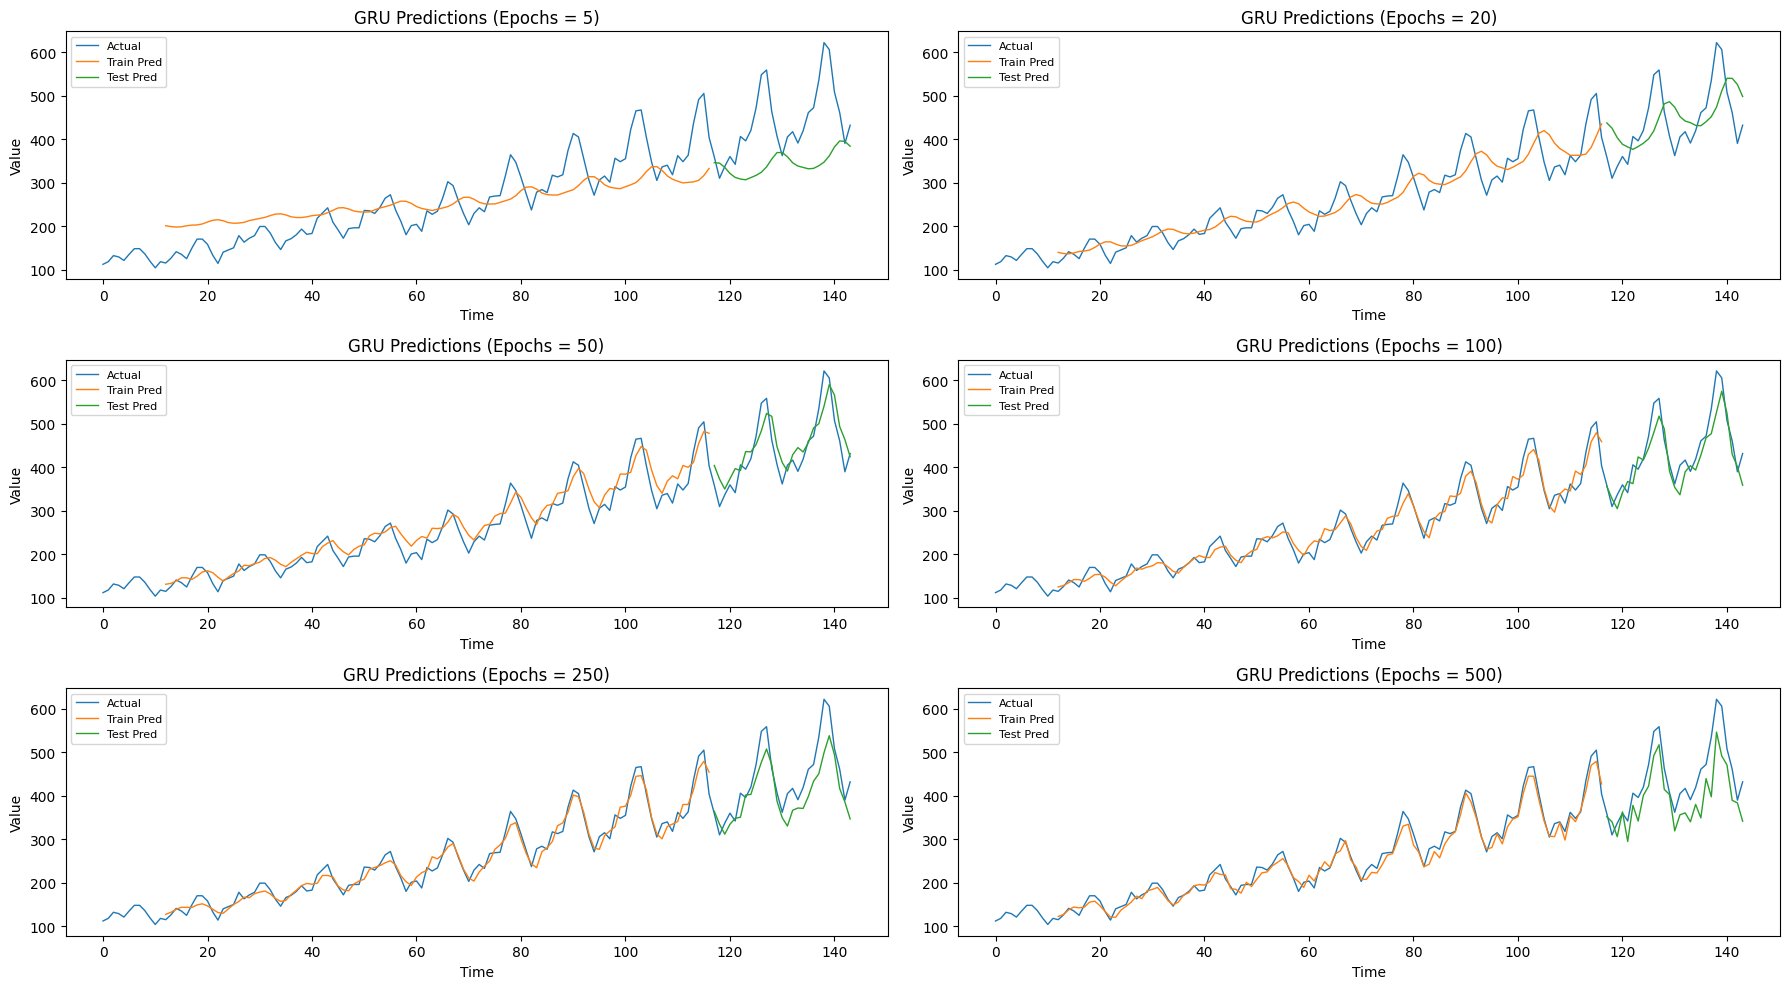

In [4]:
epoch_list = [5, 20, 50, 100, 250, 500]

plt.figure(figsize=(18, 10))

for i, EPOCHS in enumerate(epoch_list, 1):

    model = Sequential()
    model.add(GRU(64, input_shape=(time_step, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    model.fit(X_train, y_train, validation_data=(X_test, y_test),
              epochs=EPOCHS, batch_size=16, verbose=0)

    train_predict = model.predict(X_train, verbose=0)
    test_predict = model.predict(X_test, verbose=0)

    train_predict = scaler.inverse_transform(train_predict)
    test_predict = scaler.inverse_transform(test_predict)

    train_plot = np.empty_like(data)
    train_plot[:] = np.nan
    train_plot[time_step:time_step + len(train_predict)] = train_predict

    test_plot = np.empty_like(data)
    test_plot[:] = np.nan
    test_start = time_step + len(train_predict)
    test_end = test_start + len(test_predict)
    test_plot[test_start:test_end] = test_predict

    plt.subplot(3, 2, i)
    plt.plot(data, label="Actual", linewidth=1)
    plt.plot(train_plot, label="Train Pred", linewidth=1)
    plt.plot(test_plot, label="Test Pred", linewidth=1)
    plt.title(f"GRU Predictions (Epochs = {EPOCHS})")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.legend(fontsize=8)

plt.tight_layout()
plt.show()